In [7]:
# 导入相关的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## 导入Boston数据集

In [9]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


直接导入会失败，原因是scikit-learn库把它删掉了，所以可以用下面这个代码去下载

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [11]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Boston数据集的介绍如下：

Boston house prices dataset


---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

In [13]:
data.shape

(506, 13)

In [14]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [15]:
df = pd.DataFrame(data=data, columns=feature_names)

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 分割数据集

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=46, random_state=1024)

In [19]:
display(X_train.shape, X_test.shape)

(460, 13)

(46, 13)

## 基于KNN模型（不进行标准化和归一化）

In [59]:
knn = KNeighborsRegressor()

In [60]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [61]:
y_pred = knn.predict(X_test)

In [62]:
knn.score(X_test, y_test)

0.6750124077295723

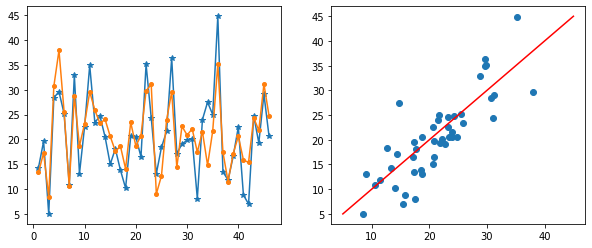

In [63]:
plt.figure(figsize=(5*2, 4*1))

axes1 = plt.subplot(1, 2, 1)
axes1.plot(np.linspace(1, 46, num=46), y_test, label='True', marker='*', markersize=6)
axes1.plot(np.linspace(1, 46, num=46), y_pred, label='Pred', marker='o', markersize=4)

axes2 = plt.subplot(1, 2, 2)
axes2.scatter(y_pred, y_test)
axes2.plot(np.linspace(5, 45, num=10), np.linspace(5, 45, num=10), c='r')

## 基于KNN模型（只进行归一化处理）

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [66]:
knn = KNeighborsRegressor()

In [67]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [68]:
y_pred = knn.predict(X_test_scaled)

In [69]:
knn.score(X_test_scaled, y_test)

0.6926947780582802

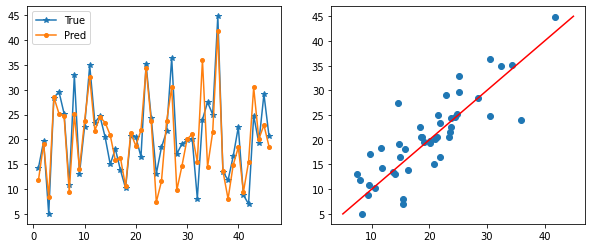

In [70]:
plt.figure(figsize=(5*2, 4*1))

axes1 = plt.subplot(1, 2, 1)
axes1.plot(np.linspace(1, 46, num=46), y_test, label='True', marker='*', markersize=6)
axes1.plot(np.linspace(1, 46, num=46), y_pred, label='Pred', marker='o', markersize=4)
axes1.legend()

axes2 = plt.subplot(1, 2, 2)
axes2.scatter(y_pred, y_test)
axes2.plot(np.linspace(5, 45, 10), np.linspace(5, 45, 10), c='r')

plt.show()

## 基于KNN模型（只进行标准化处理）

In [71]:
scaler = StandardScaler()

In [72]:
X_tarin_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
knn = KNeighborsRegressor()

In [74]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [75]:
y_pred = knn.predict(X_test_scaled)

In [76]:
knn.score(X_test_scaled, y_test)

0.23672894905330977

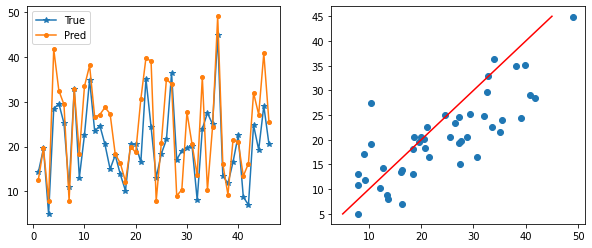

In [77]:
plt.figure(figsize=(5*2, 4*1))

axes1 = plt.subplot(1, 2, 1)
axes1.plot(np.linspace(1, 46, num=46), y_test, label='True', marker='*', markersize=6)
axes1.plot(np.linspace(1, 46, num=46), y_pred, label='Pred', marker='o', markersize=4)
axes1.legend()

axes2 = plt.subplot(1, 2, 2)
axes2.scatter(y_pred, y_test)
axes2.plot(np.linspace(5, 45, 10), np.linspace(5, 45, 10), c='r')

plt.show()

## 进行特征筛选

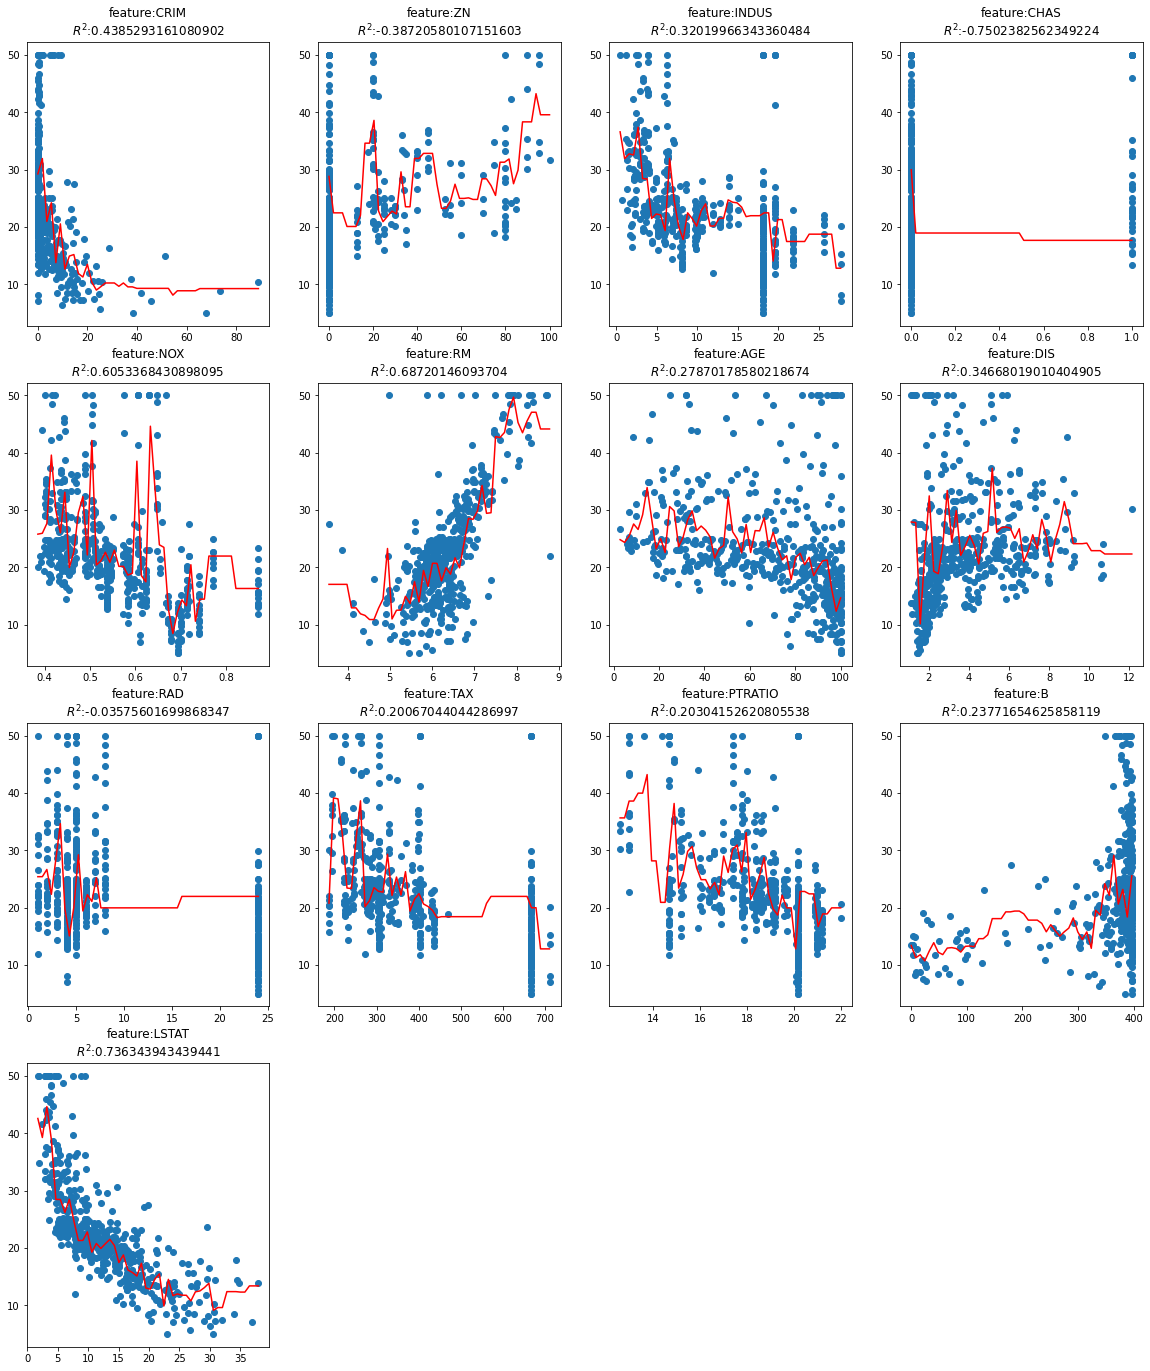

In [126]:
# 设置画布大小
plt.figure(figsize=(4 * 5, 4 * 6))

# 初始化一个字典，用于存储每个特征的R^2分数
best_features = {}

# 遍历特征名称列表
for i, col in enumerate(feature_names, start=1):
    # 提取当前特征的数据
    X_train = df[[col]].values

    # 创建KNN回归模型
    knn = KNeighborsRegressor()
    # 使用当前特征数据和目标值进行训练
    knn.fit(X_train, target)

    # 生成测试数据
    X_test = np.linspace(X_train.min(), X_train.max(), num=50).reshape(-1, 1)
    # 对测试数据进行预测
    y_pred = knn.predict(X_test)
    # 计算当前特征的R^2分数
    score = knn.score(X_train, target)
    # 将当前特征的R^2分数存入字典
    best_features[col] = score
    
    # 创建一个子图
    axes = plt.subplot(4, 4, i)
    # 绘制预测结果曲线（红色）
    axes.plot(X_test, y_pred, c='r')
    # 绘制原始数据点（散点图）
    axes.scatter(X_train, target)
    # 设置子图标题，显示当前特征名称和R^2分数
    axes.set_title('feature:{0}\n$R^2$:{1}'.format(col, score))


In [113]:
# 对字典best_features进行排序，按照值降序排列
dict(sorted(best_features.items(), key=lambda x: x[1], reverse=True))

{'LSTAT': 0.736343943439441,
 'RM': 0.68720146093704,
 'NOX': 0.6053368430898095,
 'CRIM': 0.4385293161080902,
 'DIS': 0.34668019010404905,
 'INDUS': 0.32019966343360484,
 'AGE': 0.27870178580218674,
 'B': 0.23771654625858119,
 'PTRATIO': 0.20304152620805538,
 'TAX': 0.20067044044286997,
 'RAD': -0.03575601699868347,
 'ZN': -0.38720580107151603,
 'CHAS': -0.7502382562349224}

特征筛选出对房价影响较大的几个特征：LSTAT、RM、NOX、CRIM、DIS、INDUS、AGE、B、PTRATIO

## 基于KNN模型（采用筛选的特征+归一化）

In [115]:
# 从数据中提取指定的列，并将其转换为numpy数组
data = df[['LSTAT', 'RM', 'NOX', 'CRIM', 'DIS', 'INDUS', 'AGE', 'B', 'PTRATIO']].values

In [116]:
data

array([[  4.98 ,   6.575,   0.538, ...,  65.2  , 396.9  ,  15.3  ],
       [  9.14 ,   6.421,   0.469, ...,  78.9  , 396.9  ,  17.8  ],
       [  4.03 ,   7.185,   0.469, ...,  61.1  , 392.83 ,  17.8  ],
       ...,
       [  5.64 ,   6.976,   0.573, ...,  91.   , 396.9  ,  21.   ],
       [  6.48 ,   6.794,   0.573, ...,  89.3  , 393.45 ,  21.   ],
       [  7.88 ,   6.03 ,   0.573, ...,  80.8  , 396.9  ,  21.   ]])

In [117]:
# 将数据集划分为训练集和测试集，其中测试集的大小为46，随机种子为10
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=46, random_state=10)

In [118]:
display(X_train.shape, X_test.shape)

(460, 9)

(46, 9)

In [119]:
# 创建一个最小最大值归一化缩放器对象
scaler = MinMaxScaler()

In [120]:
# 使用训练集对缩放器进行拟合，并对训练集进行缩放
X_train_scaled = scaler.fit_transform(X_train)
# 使用训练集对缩放器进行拟合，并对测试集进行缩放
X_test_scaled = scaler.fit_transform(X_test)

In [121]:
# 创建一个K近邻回归器对象
knn = KNeighborsRegressor()

In [122]:
# 使用缩放后的训练集和对应的目标值对K近邻回归器进行拟合
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [123]:
# 使用缩放后的测试集进行预测
y_pred = knn.predict(X_test_scaled)

In [124]:
# 计算K近邻回归器在缩放后的测试集上的得分
knn.score(X_test_scaled, y_test)

0.7523940740213143

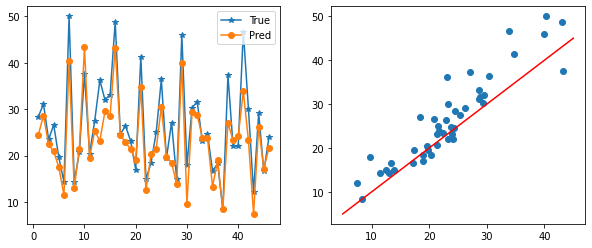

In [125]:
# 创建一个图形对象，设置图形的大小
plt.figure(figsize=(2*5, 1*4))

# 创建一个子图对象，用于绘制真实值和预测值的对比图
axes1 = plt.subplot(1, 2, 1)
# 绘制真实值曲线，标记为'True'
axes1.plot(np.linspace(1, 46, num=46), y_test, marker='*', markersize=6, label='True')
# 绘制预测值曲线，标记为'Pred'
axes1.plot(np.linspace(1, 46, num=46), y_pred, marker='o', markersize=6, label='Pred')
# 显示图例
axes1.legend()

# 创建一个子图对象，用于绘制预测值与真实值的散点图
axes2 = plt.subplot(1, 2, 2)
# 绘制散点图
axes2.scatter(y_pred, y_test)
# 绘制对角线
axes2.plot(np.linspace(5, 45, 10), np.linspace(5, 45, 10), c='r')
